# Exploración de datos

### Importación de librerías

In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from src.tools.tools import plot_is_tumor_distribution, plot_bbox_area_distribution, plot_split_distribution
import ast
data_names=["datos Base", "datos aumentados x4", "datos aumentados x10"]

Este notebook tiene como finalidad realizar una exploración de los conjuntos de datos que se van a utilizar para hacer la comparativa. 

### Conjunto de datos "Brain"

El conjuntos de datos "Brain" corresponde a imágenes de resonancia magnética (RM) del cerebro junto con máscaras de segmentación manual de tumores. Las imágenes se obtuvieron de The Cancer Imaging Archive (TCIA).

El conjunto de datos base consta de **3929 imágenes** con sus correspondientes mascaras. 
Este conjuntos se le ha aplicado **aumento de datos** con diferentes transformaciones en un factor x4 y x10 y aplicando un **balanceo de datos** para igualar las clases positiva (tumor) y negativa (no tumor) resultando en dos conjuntos de datos de **19835 imágenes** y **43599 imágenes**. 

In [2]:
base_path = "../datasets/brain/base_df.csv"
aug4_path = "../datasets/brain/augmented4_df.csv"
aug10_path = "../datasets/brain/augmented10_df.csv"

base_df = pd.read_csv(base_path)
aug4_df = pd.read_csv(aug4_path)
aug10_df = pd.read_csv(aug10_path)
len(base_df), len(aug4_df), len(aug10_df)

(3929, 19835, 43599)

#### Distribución de tumor contra no tumor

El siguiente gráfico presenta la distribución de los imágenes que contienen uno o varios tumores y ninguno para cada unos de los tres conjuntos de datos.

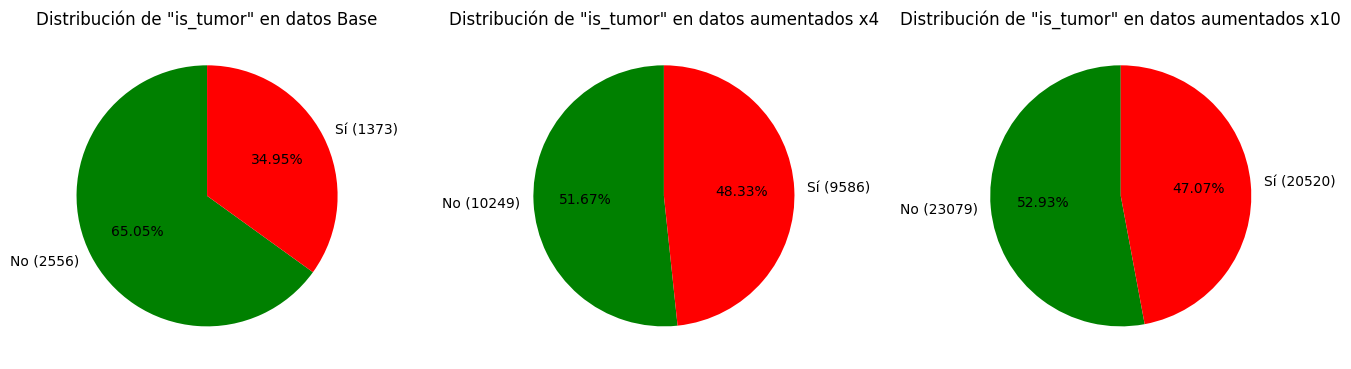

In [3]:
plot_is_tumor_distribution(dfs = [base_df, aug4_df, aug10_df], data_names = data_names)

Se puede observar como en el conjunto de datos aumentados x4 y x10, el desbalance de imágenes que contiene al menos un tumor y las que no contienen ninguno se ha reducido significativamente acercándose al 50% correspondiente.

#### Área del "BoundingBox" asociado a la máscara del tumor

El "BoundingBox" se ha calculado creando el rectángulo mínimo que envuelve a la máscara. Se puede observar que la distrubución no ha variado significativamente favorenciento o perjudicando cierto tipo de tamaño de tumores. 

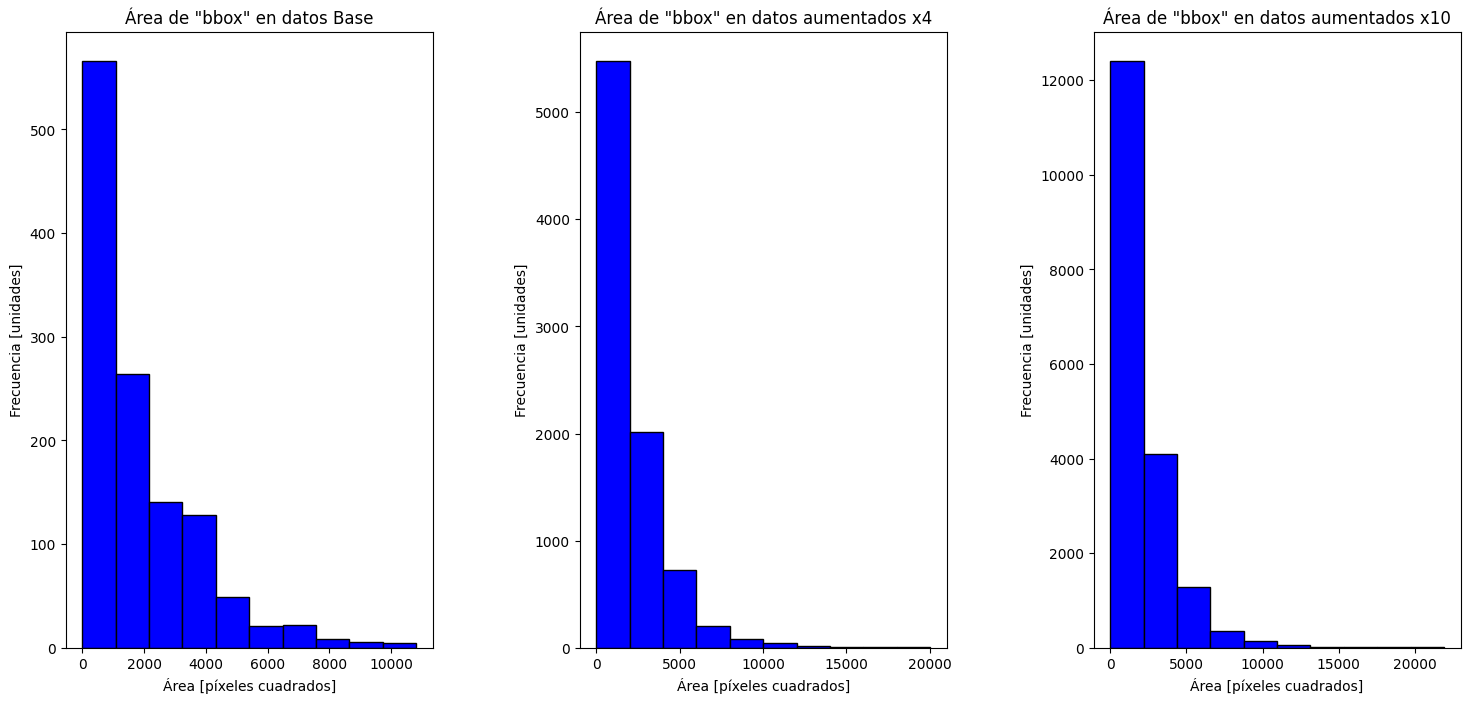

In [4]:

plot_bbox_area_distribution(dfs = [base_df, aug4_df, aug10_df], data_names=data_names)

#### Distrubución entre conjuntos de Train/Val/Test para cada conjunto de datos

Se ha escogido una partición de 60%,20% y 20% para entrenamiento, validación y test correspondientemente. El siguiente gráfico muestra que esta proporción se mantiene en los 3 conjuntos de datos.

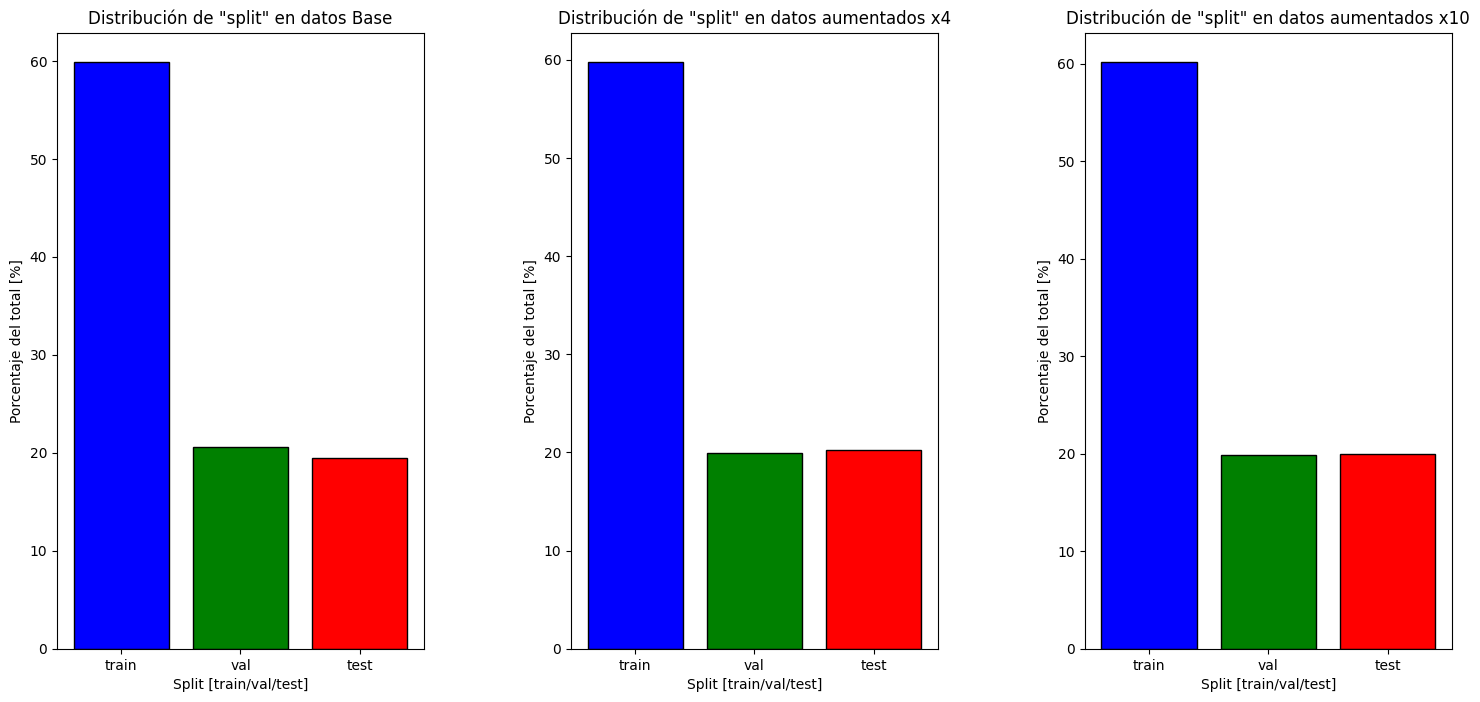

In [5]:
plot_split_distribution(dfs = [base_df, aug4_df, aug10_df], data_names=data_names)